In [7]:
import dot
import kwant
import matplotlib.pyplot as plt
import numpy as np
params = dict(crystal = 'square', shape = 'square', length = 100, width = 100, m = 5)
syst_dot_small = dot.make_dot(params)
syst = syst_dot_small.finalized()

# Define density operator
kwant_op = kwant.operator.Density(syst, sum=False)
# Calculate local spectral density
local_dos = kwant.kpm.SpectralDensity(syst, operator=kwant_op, rng=0)
# Refine calculation
local_dos.add_moments(100)
local_dos.add_vectors(10)

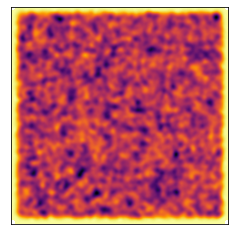

In [30]:
# Calculate LDoS at energy E
energy_ldos = local_dos(energy = -1.)

# Plot
plt.rcParams.update({'font.size': 30})
kwant.plotter.density(
    syst, np.real(energy_ldos),
    cmap = 'inferno_r',
    relwidth=0.05,
    background = 'w',
    show = False,
    colorbar = False
)
plt.xticks([])
plt.yticks([])
plt.savefig('featured.png')

# Elétrons confinados

Esse post é o resultado um pedaço de uma apresentação que fiz recentemente. O conteúdo é, de certa forma, um quanto tanto técnico. Mas, como foi uma apresentação para um público de uma área diferente da minha, evitei ao máximo usar jargões. Isso, junto com o fato de que o objetivo era trazer o conteúdo de forma bastante introdutória, me fez pensar em transformar em um texto para esse blog que acaba de nascer.

## Semicondutores

Talvez você já tenha ouvido o termo acima em algum momento -- é usado para classificar uma classe bem específica de materiais em relação à capacidade de um material de conduzir eletricidade. O que talvez você nunca tenha ouvido, porém, é que existe uma definição bem precisa baseada nas **bandas de energia** do material. 

A ideia não é tão complicada. Elétrons em um átomo podem ocupar diferentes níveis de energia. Você talvez lembre que um elétron em um átomo pode ocupar diferentes camadas (ou orbitais, se quisermos ser um pouco mais formais), cada uma com energias diferentes. Ao colocar vários átomos juntos, níveis de energia de átomos diferentes interagem entre si, e se tornam **bandas**. Uma forma bastante simples de observar bandas de energia é olhando para uma quantidade chamada **densidade de estados** ($D$). O nome já diz alguma coisa: a quantidade se refere ao número de estados ($N$) que um elétron pode ocupar num intervalo infinitesimal de energia ($\epsilon$):
$$
D(\epsilon) = \frac{d N(\epsilon)}{d \epsilon}.
$$

Tudo bem, imagino que tudo isso pareça bastante abstrato. Então vamos exemplificar. Vamos considerar um conjunto de átomos com apenas 2 orbitais. Organizaremos esses átomos conforme a ilustração abaixo.

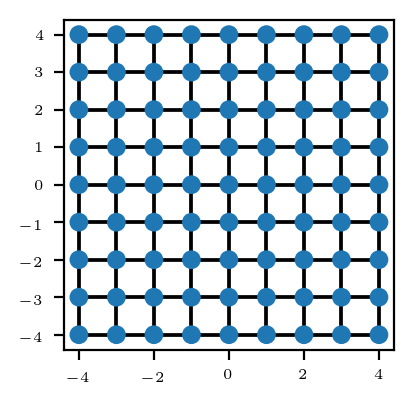

In [1]:
import dot
params = dict(crystal = 'square', shape = 'square', length = 5, width = 5, m = 5)
syst_dot_small = dot.make_dot(params)
dot.plot_dot(syst_dot_small)

Mas, pra tornar tudo mais interessante, vamos considerar um conjunto maior de átomos: um sistema com $50 \times 50$ átomos.

In [2]:
params = dict(crystal = 'square', shape = 'square', length = 50, width = 50, m = 5)
syst_dot = dot.make_dot(params)
params['lenght'], params['width'] = 2, 2
syst_strip = dot.make_dot(params)
dot.plot_dot(syst_dot)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

E = 10
Es = np.linspace(-E, E, 500)

dos_dot = dot.dos(syst_dot, Es)
dos_strip = dot.dos(syst_strip, Es)

/home/antonio/anaconda3/envs/kwant-env/lib/python3.7/site-packages/kwant/kpm.py:273: RuntimeWarning: invalid value encountered in sqrt
  g_e = (np.pi * np.sqrt(1 - e) * np.sqrt(1 + e))


Ao calcular a densidade de estados desse sistema, vemos que existem duas regiões em azul (bandas). Cada uma dessas regiões corresponde a um orbital diferente. Se estivéssemos considerando um átomo com $n$ orbitais, deveriamos ter $n$ bandas diferentes. Repare que as duas bandas estão separadas por um intervalo de energia $\Delta$, chamado de *gap*.

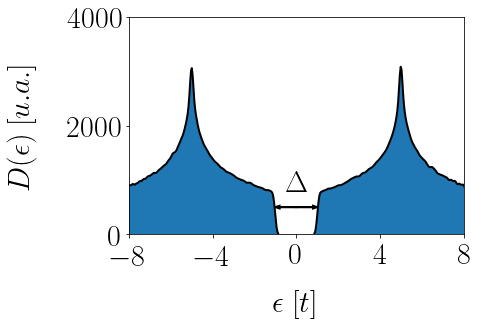

In [19]:
# Plot
plt.rcParams.update({'font.size': 30})
masked_dos = np.ma.masked_less(dos_dot, 10)
plt.plot(Es, masked_dos, c = 'k')
plt.fill_between(Es, 0, dos_dot)
plt.xlabel(r'$\epsilon\ [t]$', labelpad = 20)
plt.ylabel(r'$D(\epsilon) \ [u.a.]$', labelpad = 30)
plt.ylim(0, 4000)
plt.xlim(-8, 8)

plt.arrow(0, 500, 1., 0, head_width = 50, head_length=0.2, linewidth=2, color='k', length_includes_head=True)
plt.arrow(0, 500, -1., 0,head_width = 50, head_length=0.2, linewidth=2, color='k', length_includes_head=True)
plt.text(x = -0.5, y = 800, s = r'$\Delta$')

plt.xticks([-8, -4, 0, 4, 8])
plt.show()

Se o sistema for grande o suficiente, essa energia é uma característica do material. Ou seja, só depende depende dos constituintes (ou seja, dos átomos e das ligações químicas). Contudo, isso deixa de ser verdade se o sistema for pequeno demais.

E o que acontece, então, se diminuirmos o sistema? Vamos comparar a densidade de estados anterior ($50 \times 50$ átomos) com a densidade de estados de um sistema bem menor ($2 \times 2$ átomos, apenas). O resultado é o que você pode ver no gráfico abaixo.

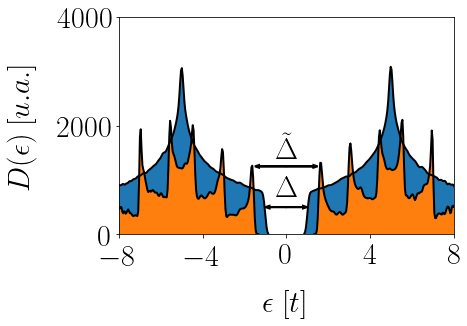

In [37]:
# Plot
plt.rcParams.update({'font.size': 30})
masked_dos_big = np.ma.masked_less(dos_dot, 10)
masked_dos_small = np.ma.masked_less(dos_strip, 0.1)
plt.plot(Es, masked_dos_big, Es, masked_dos_small * 20, c = 'k')
plt.fill_between(Es, 0, dos_dot)
plt.fill_between(Es, 0, dos_strip * 20)
plt.xlabel(r'$\epsilon\ [t]$', labelpad = 20)
plt.ylabel(r'$D(\epsilon)\ [u.a.]$', labelpad = 20)

plt.arrow(0, 500, 1., 0, head_width = 50, head_length=0.2, linewidth=2, color='k', length_includes_head=True)
plt.arrow(0, 500, -1., 0,head_width = 50, head_length=0.2, linewidth=2, color='k', length_includes_head=True)
plt.text(x = -0.5, y = 700, s = r'$\Delta$')

plt.arrow(0, 1250, 1.5, 0, head_width = 50, head_length=0.2, linewidth=2, color='k', length_includes_head=True)
plt.arrow(0, 1250, -1.5, 0,head_width = 50, head_length=0.2, linewidth=2, color='k', length_includes_head=True)
plt.text(x = -0.5, y = 1400, s = r'$\tilde{\Delta}$')

plt.ylim(0, 4000)
plt.xlim(-8, 8)
plt.xticks([-8, -4, 0, 4, 8])
plt.show()

Veja que o gap de energia aumenta ($\tilde{\Delta} > \Delta$)! Mas o que tem de útil nisso?

O gap define algumas propriedades importantes de um material. Por exemplo, a frequência de absorção óptica, $\nu_{abs}$, que é aproximadamente dada por
$$
\nu_{abs} = \frac{\Delta}{\hbar}
$$
em que $\hbar$ é a [constante de Planck reduzida](https://pt.wikipedia.org/wiki/Constante_de_Planck). Ao aumentar o gap, a frequência aumenta. Você pode ver isso, por exemplo, nessas [imagens de uma solução de nanopartículas de CdSe](https://chemistry.beloit.edu/edetc/background/quantum_dots/index.html). Esse controle é tão preciso que hoje em dia é usado para a fabricação de TVs com alta fidelidade de cores (veja um exemplo [aqui](https://www.youtube.com/watch?v=otetJbohPBI)).

### Como entender isso?

O que faz, então, o *gap* ser uma característica única de um material, se pegarmos um pedaço grande o suficiente, mas não é mais verdade se considerarmos partículas muito pequenas? A resposta para a paergunta está no chamado confinamento eletrônico.

Elétrons tem um comportamento ondulatório. Isso implica que, quando colocados em uma região bem delimitada do espaço (por exemplo, dentro de um material), tenham a forma de ondas estacionárias. Assim, como a corda vibrante de um violão. Por exemplo, ao prender elétrons num fio de tamanho $L$, as ondas estacionárias resultantes devem ter nós nas duas extremidades do fio. Cada onda dessas é uma função $\psi = \psi(x)$. 

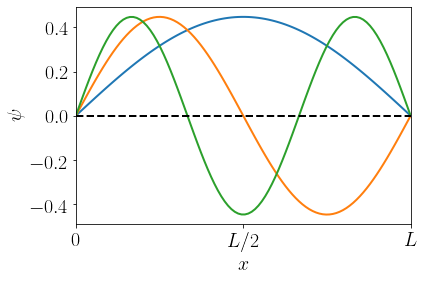

In [1]:
import electron_box
electron_box.plot_psi(n_max = 3)

A essas ondas, damos o nome de modos harmônicos, e o número de vezes que passa pelo zero dá o nome do modo harmônico. Por exemplo, a curva azul corresponde ao primeiro harmônico; a laranja, ao segundo; a verde, ao terceiro e assim por diante. Quanto mais alto o harmônico, mais energia é necessário para ativá-lo. E essa energia também depende do tamanho do fio: quanto mais curto o fio, mais energia é necessária. Para elétrons, as energias seguem o comportamento do gráfico abaixo:

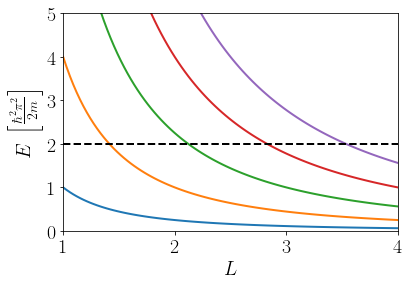

In [2]:
electron_box.plot_E(n_max = 5)

Vamos supor que os elétrons dentro de um material tenham uma energia máxima representada pela linha tracejada do gráfico acima. Isso siginifica que um sistema com $L = 2$, por exemplo, vai ter apenas dois harmônicos com energia abaixo da linha tracejada, enquanto que, se o sistema for muito grande, podemos colocar quantos harmônicos quisermos abaixo da linha tracejada.

Isso significa que, quando um sistema é muito grande, o número de harmônicos é grande demais, e as propriedades ópticas acabam se tornando independentes das energias dos harmônicos. Quando o sistema é muito pequeno, o tamanho do gap vai depender quase exclusivamente do número de harmônicos que podem ser ativados. E isso permite um controle das propriedades ópticas de um semicondutor.